# COMP2002 - Machine Learning and Optimisation Assignment
This template can be used for the weekly coding exercises, and for your coursework.

In [1]:
# Import packages used in the Python Program
import pandas as pandas
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor 
from sklearn.neural_network import MLPRegressor 
from sklearn.svm import SVR 
from sklearn.metrics import mean_absolute_error
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [2]:
# Import datasets and Train with AlgerianFF Region 1 and Test with Algerian Region 2

In [3]:
AffRegion1Dataset = pandas.read_csv("AlgerianFF_Region1.csv")
AffRegion2Dataset = pandas.read_csv("AlgerianFF_Region2.csv")

In [4]:
AffRegion1Dataset

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,9,2012,31,54,11,0.0,82.0,6.0,16.3,2.5,6.2,1.7
118,27,9,2012,31,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1
119,28,9,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1


In [5]:
AffRegion2Dataset

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2
1,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2
2,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1
3,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0
4,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5
118,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0
119,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2
120,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7


In [6]:
# Retrieve and seperate inputs/targets from datasets

In [7]:
inputs_DatasetRegion1 = AffRegion1Dataset[['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI']]

In [8]:
targets_DatasetRegion1 = AffRegion1Dataset[['FWI']]

In [9]:
inputs_testRegion2 = AffRegion2Dataset[['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI']]

In [10]:
targets_testData = AffRegion2Dataset[['FWI']]

In [11]:
# Normalisze the data set inputs

In [12]:
scaler = MinMaxScaler()
trainingData = scaler.fit_transform(inputs_DatasetRegion1)
testingData = scaler.fit_transform(inputs_testRegion2)

In [13]:
# Beginning of Regression Methods

In [14]:
# Random Forest Regression Method

In [15]:
RandomF_Regressor = RandomForestRegressor()
RandomF_Regressor.fit(trainingData, targets_DatasetRegion1.values.ravel())

RandomForestRegressor()

In [16]:
RandonF_outputs = RandomF_Regressor.predict(testingData)
RandonForest_MAE = (mean_absolute_error(targets_testData, RandonF_outputs))
print(RandonForest_MAE)

2.9701557377049164


In [17]:
# Cross Validation Score for Random Forest

In [18]:
RandomF_CVS = cross_val_score(RandomF_Regressor, testingData, targets_testData.values.ravel() , cv=3)

In [19]:
# Random MLP Regressor Method

In [20]:
MLP_Regressor = MLPRegressor()

In [21]:
MLP_Regressor.fit(trainingData, targets_DatasetRegion1.values.ravel()) #2000 iterations

MLPRegressor()

In [22]:
MLP_Outputs = MLP_Regressor.predict(testingData)

In [23]:
MLP_MAE = (mean_absolute_error(targets_testData, MLP_Outputs))

In [24]:
print(MLP_MAE)

2.6443429725242384


In [25]:
# Cross Validation Score for Neural Network

In [26]:
MLP_CVS = cross_val_score(MLP_Regressor, testingData, targets_testData.values.ravel(), cv=3)

In [27]:
# Random Support Vector Machine Method

In [28]:
SVR_Regressor = SVR()

In [29]:
SVR_Regressor.fit(trainingData, targets_DatasetRegion1.values.ravel())

SVR()

In [30]:
SVR_Outputs = SVR_Regressor.predict(testingData)

In [31]:
SVR_MAE = (mean_absolute_error(targets_testData, SVR_Outputs))

In [32]:
print(SVR_MAE)

3.265285328447862


In [33]:
# Cross Validation Score for Support Vector Machine

In [34]:
SVR_CVS = cross_val_score(SVR_Regressor, testingData, targets_testData.values.ravel() , cv=3)

In [35]:
# Assessment of Regression - Boxplot and Cross Validation Scores

In [36]:
# Inert the Cross Validation Scores of all regressor models into Boxplot to display the MAE Rates

In [37]:
data = [RandomF_CVS, MLP_CVS, SVR_CVS]

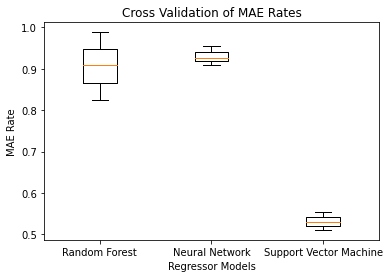

In [38]:
# Creating plot
plt.boxplot(data)
  
# Adding title 
plt.title("Cross Validation of MAE Rates")

plt.xticks([1, 2, 3], ['Random Forest', 'Neural Network', 'Support Vector Machine'])
plt.xlabel('Regressor Models')
plt.ylabel('MAE Rate')

    
# show plot
plt.show()

In [70]:
# Part 2 Evolutionary Computation
# The fitness is the sum of the routes taken (Total distance)

# Import Necessary packages for code to function
import pandas as pandas
import numpy as np
import random


# Import the distances/city files to be used in the functions and to call the functions


# Change the datasets to short to view the name_short_corrected distances
citiesData = pandas.read_csv("cities.txt", header=None);
routedata = pandas.read_csv("distances.csv", header=None);

In [71]:
# Part 2.1 - Start
# Create a randomly generated solution of cities from the city dataset
def RandomSolutionCity(randomRoute):

    citiesData = list(range(len(randomRoute)))
    cityRoute = []

    for i in range(len(randomRoute)):

        randomCity = citiesData[random.randint(0, len(citiesData) - 1)]
        cityRoute.append(randomCity)
        citiesData.remove(randomCity)

    return cityRoute



# Get the total fitness distance of a salesmans route - fitness function
def CaculateDistance(tsp, solution):

    # Calculate the fitness and return it.
    CaculateDistance=0
    for i in range(1, len(solution)):

        CaculateDistance += tsp[solution[i - 1]][solution[i]]

    return CaculateDistance
# Part 2.1 - End

In [72]:
# Test calculation with a random solution
CaculateDistance(routedata ,RandomSolutionCity(citiesData))

4545.0

In [73]:
# Test calculation with a solution - value should be 3857.4
CaculateDistance(routedata ,[5, 3, 16, 11, 14, 2, 12, 13, 1, 10, 15, 17, 6, 4, 9, 0, 18, 19, 7, 8])

3857.3999999999996

In [74]:
# Part 2.2 - Start

avgFitnessSwap = []
avgFitnessRR = []

# Ruin and Recreate randomly generates a new route every iteration
def ruinAndRecreateMutation(NumOfItterations, citySolution):

    bestCityRoute = 0
    bestDistance = 0
    totalDistance = 0

    maxFitnessRR = []
    minFitnessRR = []

    print("Beginning Ruin and Recreate Mutation...")

    # Loop through randomly generated route and print out the best route
    for i in range(NumOfItterations):

        # Call the fitness function with the randomly sorted cities from the city dataset
        randomCurrentRoute = RandomSolutionCity(citySolution)
        curDistance = CaculateDistance(routedata, RandomSolutionCity(citySolution))

        if bestDistance == 0:
            bestCityRoute = randomCurrentRoute
            bestDistance = curDistance

        if bestDistance > curDistance:
            bestCityRoute = randomCurrentRoute.copy()
            bestDistance = curDistance

        print("Current Iteration: ", i, " Current Route Distance: ", curDistance, " Best Distance Overall: ", bestDistance)

        maxFitnessRR.append(curDistance)
        avgFitnessRR.append((curDistance + bestDistance) // 2)
        minFitnessRR.append(bestDistance)
        
    # Part 2.3 - Start
    # Set the plotting points for the line graphs
    plt.title("Ruin & Recreate")

    plt.plot(maxFitnessRR, label='Maximum Distance')
    plt.plot(avgFitnessRR, label='Average Distance')
    plt.plot(minFitnessRR, label='Minimum Distance')
    plt.legend()

    plt.xlabel('Number of Iterations')
    plt.ylabel('Distance')
    # Part 2.3 - End
        
    print("The Shortest Route Is: ", bestCityRoute, "The Total Distance Is: ", bestDistance)

    return bestCityRoute

In [75]:
# Swap function takes two cities and swaps them in the route
def swapMutation(NumOfItterations, randomCurrentRoute):

    from matplotlib import pyplot as plt

    bestCityRoute = 0
    bestDistance = 0
    totalDistance = 0

    maxFitnessSwap = []
    minFitnessSwap = []

    # We need to take the generated route (Parent City Route)
    # Every loop we need to take the parent route and swap two cities randomly

    # Call the fitness function with the randomly sorted cities from the city dataset
    randomCurrentRoute = RandomSolutionCity(randomCurrentRoute)
    idx = range(len(randomCurrentRoute))

    print("Beginning Swap Mutation - Testing Current Route: ", randomCurrentRoute)

    # Loop through randomly generated route and print out the best route
    for i in range(NumOfItterations):

        # randomise two city values in the parent route
        i1, i2 = random.sample(idx, 2)
        randomCurrentRoute[i1], randomCurrentRoute[i2] = randomCurrentRoute[i2], randomCurrentRoute[i1]

        #Calculate the current distance
        curDistance = CaculateDistance(routedata ,randomCurrentRoute)

        if bestDistance == 0:
            bestCityRoute = randomCurrentRoute
            bestDistance = curDistance

        if bestDistance > curDistance:
            bestCityRoute = randomCurrentRoute.copy()
            bestDistance = curDistance

        print("Current Iteration: ", i, " Current Route Distance: ", curDistance, " Best Distance Overall: ", bestDistance)

        randomCurrentRoute[i1], randomCurrentRoute[i2] = randomCurrentRoute[i2], randomCurrentRoute[i1]

        maxFitnessSwap.append(curDistance)
        avgFitnessSwap.append((curDistance + bestDistance) // 2)
        minFitnessSwap.append(bestDistance)
        
    # Part 2.3 - Start
    # Set the plotting points for the line graphs
    plt.title("Swapping Cities in Route")
    plt.plot(maxFitnessSwap, label='Maximum Distance')
    plt.plot(avgFitnessSwap, label='Average Distance')
    plt.plot(minFitnessSwap, label='Minimum Distance')
    plt.legend()

    plt.xlabel('Number of Iterations')
    plt.ylabel('Distance')
    # Part 2.3 - End

    print("The Shortest Route Is: ", bestCityRoute, "The Total Distance Is: ", bestDistance)

    return bestCityRoute


In [76]:
#find the best route distance and route
def getBestNeighbour(tsp, bestCityRoute):
    bestRouteLength = CaculateDistance(tsp, bestCityRoute)
    bestNeighbour = bestCityRoute
    for neighbour in bestCityRoute:
        currentRouteLength = CaculateDistance(tsp, bestCityRoute)
        if currentRouteLength < bestRouteLength:
            bestRouteLength = currentRouteLength
            bestNeighbour = bestCityRoute
    return bestNeighbour, bestRouteLength


In [77]:
#optimise the route taken from the mutations to find the lowest distance 
def hillclimber(mutation, cityDataset, tsp, itterations):
    
    for i in range(itterations):
        currentRoute = RandomSolutionCity(cityDataset)
        currentRouteDistance = CaculateDistance(tsp ,currentRoute)
        neighbours = mutation

        # get best value from mutation and optimise it in the while loop
        bestNeighbour, bestNeighbourRouteLength = getBestNeighbour(tsp, neighbours)

        # Get best mutation/neighbour distance and compare to current route
        while bestNeighbourRouteLength < currentRouteDistance:
            currentRoute = bestNeighbour
            currentRouteDistance = bestNeighbourRouteLength
            neighbours = mutation
            bestNeighbour, bestNeighbourRouteLength = getBestNeighbour(tsp, neighbours)

        return currentRoute, currentRouteDistance
              
# Part 2.2 - End

Beginning Swap Mutation - Testing Current Route:  [15, 1, 9, 4, 16, 5, 10, 2, 14, 0, 6, 18, 12, 11, 3, 17, 8, 19, 13, 7]
Current Iteration:  0  Current Route Distance:  5570.700000000001  Best Distance Overall:  5570.700000000001
Current Iteration:  1  Current Route Distance:  5580.1  Best Distance Overall:  5570.700000000001
Current Iteration:  2  Current Route Distance:  5528.6  Best Distance Overall:  5528.6
Current Iteration:  3  Current Route Distance:  5580.700000000001  Best Distance Overall:  5528.6
Current Iteration:  4  Current Route Distance:  5694.1  Best Distance Overall:  5528.6
Current Iteration:  5  Current Route Distance:  5656.0  Best Distance Overall:  5528.6
Current Iteration:  6  Current Route Distance:  5887.1  Best Distance Overall:  5528.6
Current Iteration:  7  Current Route Distance:  5588.3  Best Distance Overall:  5528.6
Current Iteration:  8  Current Route Distance:  5713.499999999999  Best Distance Overall:  5528.6
Current Iteration:  9  Current Route Dist

([15, 1, 9, 4, 16, 5, 3, 2, 14, 0, 6, 18, 12, 11, 10, 17, 8, 19, 13, 7],
 4722.6)

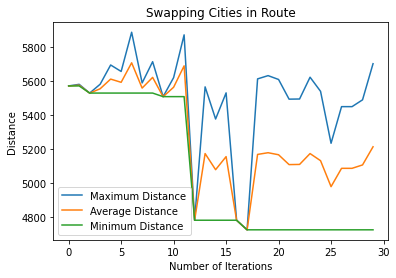

In [78]:
hillclimber(swapMutation(30, citiesData), citiesData, routedata, 30)

Beginning Ruin and Recreate Mutation...
Current Iteration:  0  Current Route Distance:  4943.1  Best Distance Overall:  4943.1
Current Iteration:  1  Current Route Distance:  5268.1  Best Distance Overall:  4943.1
Current Iteration:  2  Current Route Distance:  4702.799999999999  Best Distance Overall:  4702.799999999999
Current Iteration:  3  Current Route Distance:  5557.6  Best Distance Overall:  4702.799999999999
Current Iteration:  4  Current Route Distance:  5146.0  Best Distance Overall:  4702.799999999999
Current Iteration:  5  Current Route Distance:  4219.299999999999  Best Distance Overall:  4219.299999999999
Current Iteration:  6  Current Route Distance:  4411.5  Best Distance Overall:  4219.299999999999
Current Iteration:  7  Current Route Distance:  4870.5  Best Distance Overall:  4219.299999999999
Current Iteration:  8  Current Route Distance:  4507.1  Best Distance Overall:  4219.299999999999
Current Iteration:  9  Current Route Distance:  4828.5  Best Distance Overall:

([1, 17, 19, 5, 6, 15, 4, 14, 8, 18, 3, 9, 13, 7, 10, 16, 0, 11, 2, 12],
 4543.5)

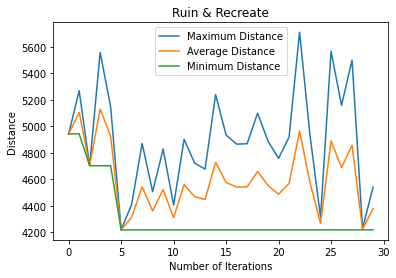

In [79]:
# Bug - Provides correct total distance, but return value for best distance changes (doesn't effect outcome - visual bug)
hillclimber(ruinAndRecreateMutation(30, citiesData), citiesData, routedata, 30)

Text(0, 0.5, 'Distance')

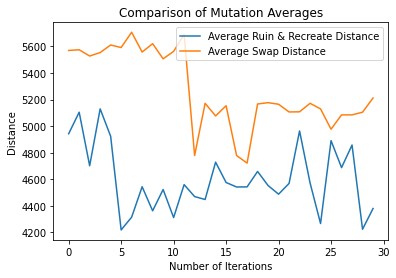

In [80]:
# Part 2.3 - Start
# Set the plotting points for the line graphs
plt.title("Comparison of Mutation Averages")
plt.plot(avgFitnessRR, label='Average Ruin & Recreate Distance')
plt.plot(avgFitnessSwap, label='Average Swap Distance')
plt.legend()

plt.xlabel('Number of Iterations')
plt.ylabel('Distance')
# Part 2.3 - End

In [81]:
# Above we can see the comparison between the two mutations (Ruin and Recreate & Swap). After running the Hillclimber Algorithm
# multiple times, I am noticing that the best mutation operator appears to be the Ruin and Recreate.
# It reaches a much better fitness than the Swap Mutator, but the swap does have a more consistency 
# due to it not being randomised, the radomisation allows us to have a higher chance a receiving a lower value as it is
# ever changing, while the swap will take the same route and only change two values from it.
# Meaning the value may change between only a few hundred, while the randomiser could alter between thousand or more